## Credit Card Fraud Detection

- In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 
- Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

# Machine Learning
from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PowerTransformer

from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# Data Imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV 

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [2]:
#Importing the Credit Card dataset
df = pd.read_csv('creditcard.csv')
#Top 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### There are 30 independent variables & 1 Dependent/Classification variable (Class)
##### - 28 of them have been modified with principal component analysis (PCA) to maintain confidentiality
##### - Time measures the seconds elapsed between the 2 consecutive transactions
##### - Amount is the transaction amount
##### - All variables are in floating point decimals

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

#print(normal_share,fraud_share)
print("Normal Transactions -> ","%.3f%%" % (normal_share))
print("Fraud Transactions  -> ","%.3f%%" % (fraud_share))

Normal Transactions ->  99.827%
Fraud Transactions  ->  0.173%


In [6]:
df.shape

(284807, 31)

In [7]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]
print(normal.shape,fraud.shape)

(284315, 31) (492, 31)


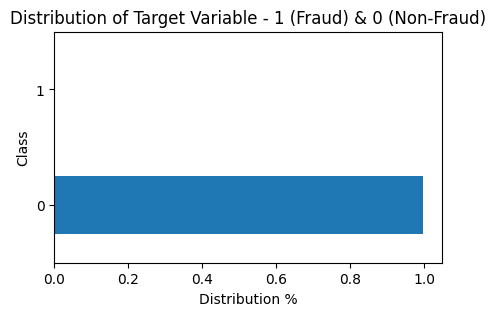

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(5,3))
df['Class'].value_counts(normalize=True).plot.barh()
plt.xlabel('Distribution %')
plt.ylabel('Class')
plt.title('Distribution of Target Variable - 1 (Fraud) & 0 (Non-Fraud)')
plt.show()

- We have 99.827% non-fradulent transactions whereas only 0.173% as fradulent out of 284807 transactions
- We can conclude there is heavy data imbalance exists which needed to be fixed before final model prediction

In [9]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

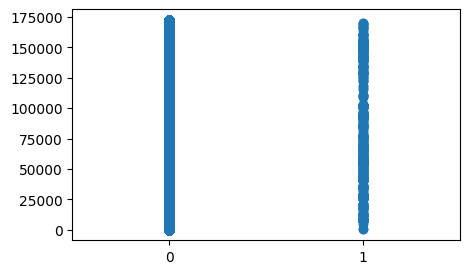

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(5,3))
plt.scatter(df['Class'].astype(str), df['Time'])
plt.margins(x=0.5)
plt.show()

In [11]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

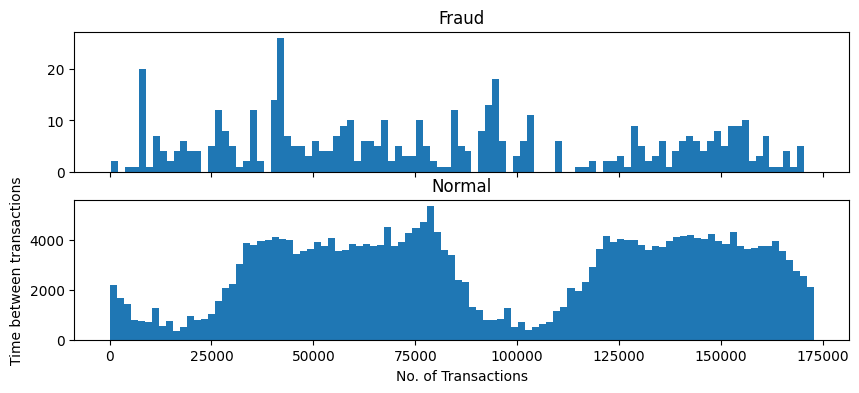

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.hist(df.Time[df.Class == 1], bins = 100)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 100)
ax2.set_title('Normal')

plt.ylabel('Time between transactions')
plt.xlabel('No. of Transactions')
plt.show()

In [13]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

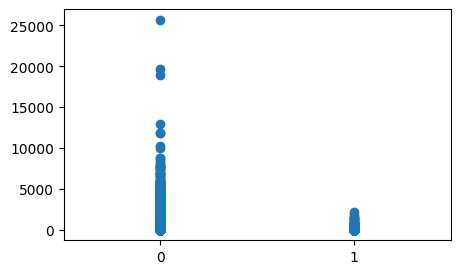

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(5,3))
plt.scatter(df['Class'].astype(str), df['Amount'])
plt.margins(x=0.5)
plt.show()

- We can conclude, Frauds have happened majorly for low transactions below 5000
- We can conclude, Frauds have happened at regular intervals in sync with non-frauds

In [15]:
#Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- All 0 indicates we dont have any missing values
- Hence we are good to consume all & no missing values treatment is needed

In [16]:
# Dropping unnecessary variables
# We tried to create a new dataframe storing all correlations between independent & dependent variables
col = list(df.columns)
new_col = pd.DataFrame()
for i in range(len(col)):
    x = df[['Class',col[i]]].corr().iloc[0:1,1:]
    new_col = pd.concat([new_col,x],axis=1)

new_cols = pd.DataFrame.transpose(new_col).sort_values(by='Class')
new_cols
    #print(df[['Class',col[i]]].corr().iloc[0:1,1:])

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


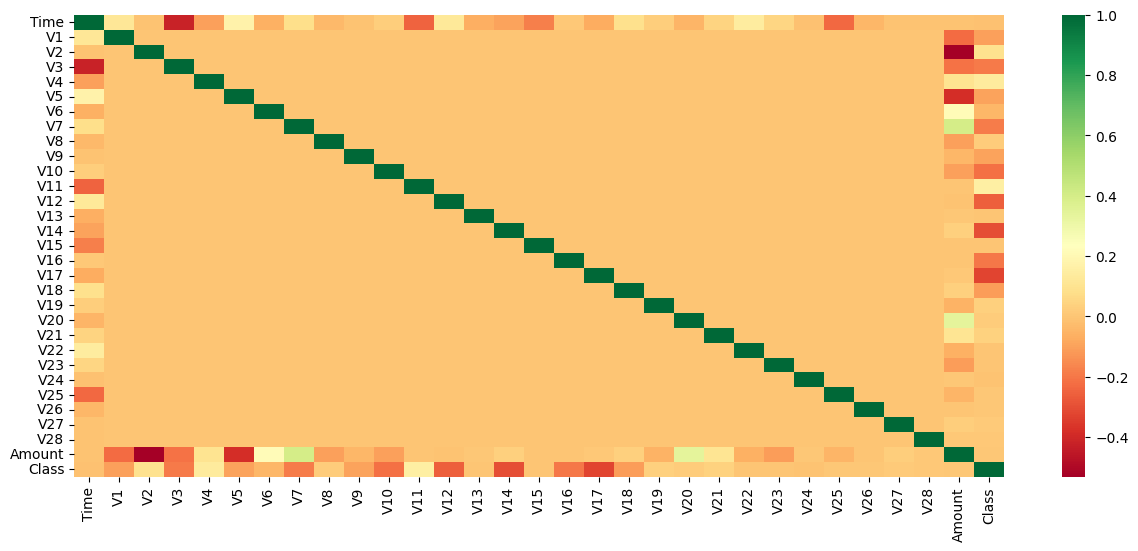

In [17]:
# Plotting the Correlation Matrix
fig = plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), cmap='RdYlGn',fmt='g')
plt.show()

In [18]:
# Drop unnecessary columns
# So from correlation heatmap & the dataframe, we can conclude below columns can be dropped
# Drop - V13, V15, V22, V23, V24, V25, V26, V28
df.drop(['V13','V15','V22','V23','V24','V25','V26','V28'],axis=1,inplace=True)
df.shape

(284807, 23)

V17	-0.326481
V14	-0.302544
V12	-0.260593
V10	-0.216883
V16	-0.196539
V3	-0.192961
V7	-0.187257
V18	-0.111485
V1	-0.101347
V9	-0.097733
V5	-0.094974
V6	-0.043643
Time	-0.012323

V24	-0.007221
V13	-0.004570
V15	-0.004223
V23	-0.002685
V22	0.000805
V25	0.003308
V26	0.004455
Amount	0.005632
V28	0.009536

V27	0.017580
V8	0.019875
V20	0.020090
V19	0.034783
V21	0.040413
V2	0.091289
V4	0.133447
V11	0.154876

### Splitting the data into train & test data

In [19]:
# X -> All Dependent Variables
# Y -> Independent Variable
y = df['Class']
x = df.drop(['Class'],axis=1)
print(x.shape,y.shape)

(284807, 22) (284807,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=6, stratify=y)

##### Preserve x_test & y_test to evaluate on the test data once you build the model

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))
print(x_train.shape, x_test.shape, y_train.shape,  y_test.shape)

print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

492
325
167
(187972, 22) (96835, 22) (187972,) (96835,)
Class
0    99.827102
1     0.172898
Name: proportion, dtype: float64
Class
0    99.827542
1     0.172458
Name: proportion, dtype: float64


In [22]:
x_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27',
       'Amount'],
      dtype='object')

### Plotting the distribution of a variable

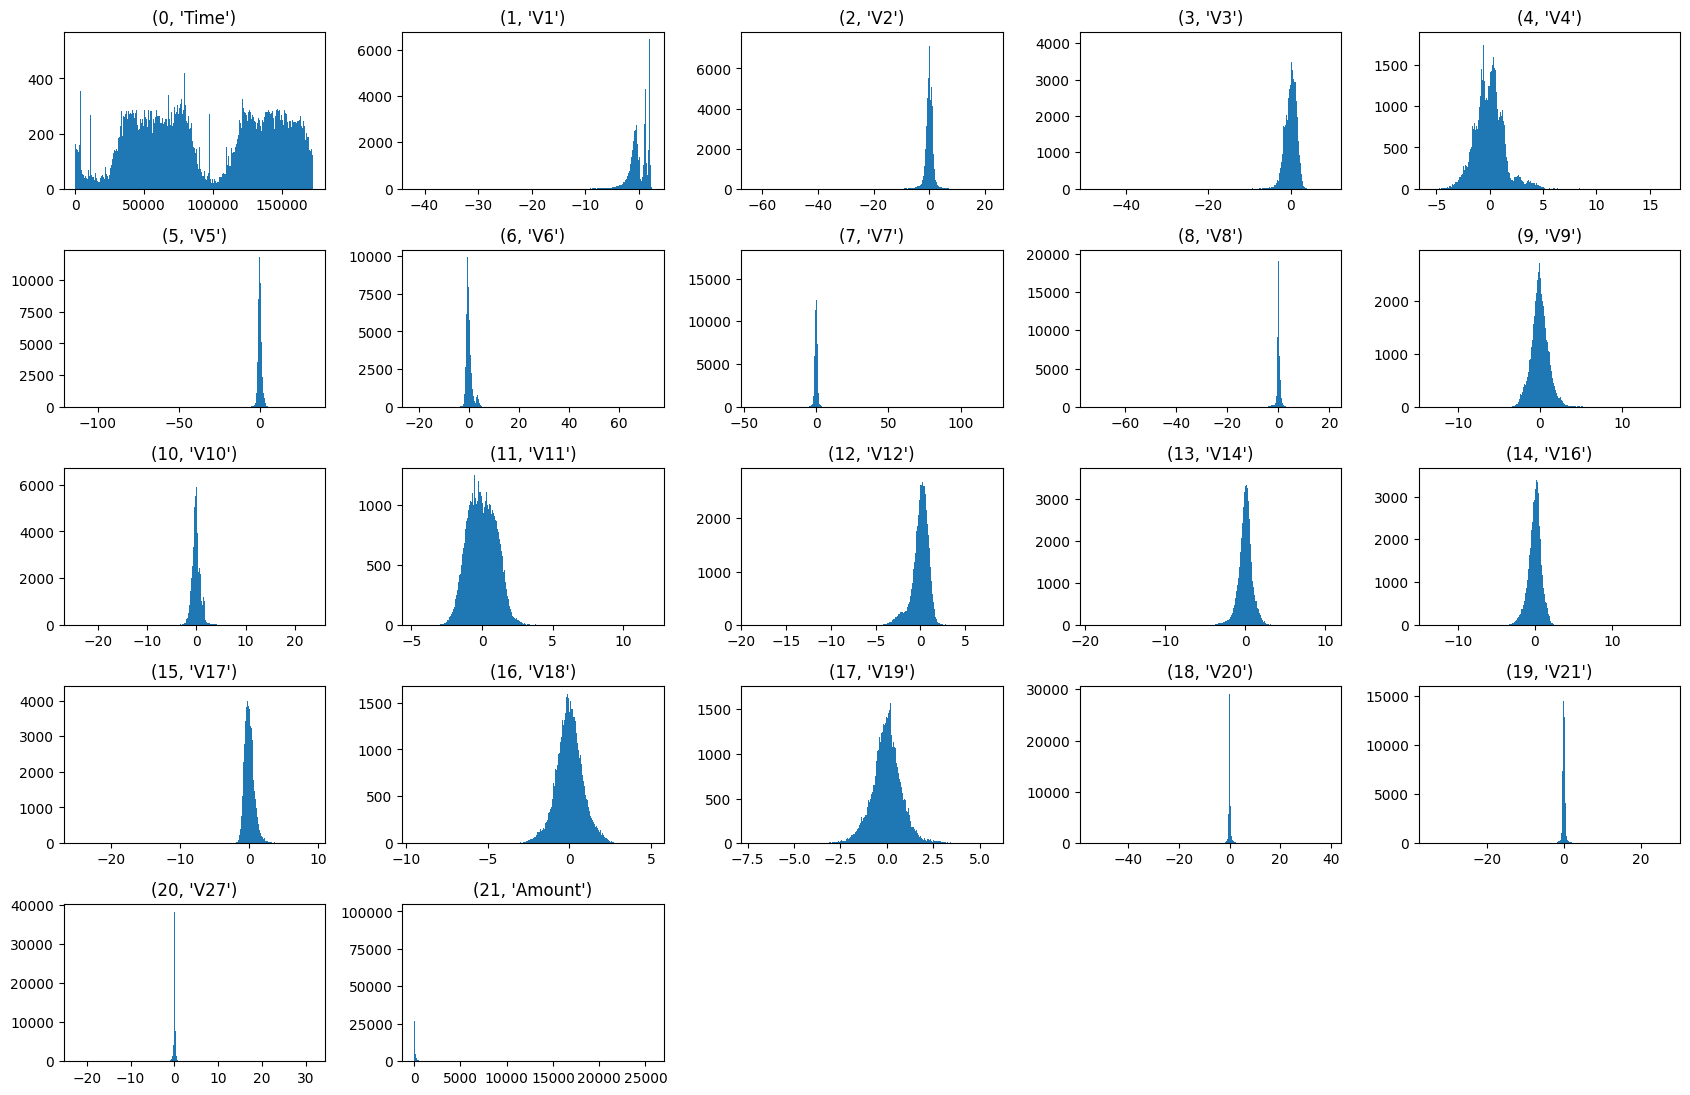

In [23]:
# we are trying to plot to all variables on a histogram to check how the distribution has been

plt.figure(figsize=(17,13))
for i in list(enumerate(x_train.columns)):
    plt.subplot(6, 5, i[0]+1)
    plt.hist(x=x_train[i[1]],bins=1000)
    plt.title(i)
    #ax = sns.displot(x_train[i[1]], kde=True)
    #ax.set(xlabel= '', ylabel='Counts', title=i)
    #plt.show()
plt.tight_layout()
plt.show()

##### - It appears few of the variables have skewness in their distribution

## Model Building
- Build a Logistic Regression model on the imbalanced dataset and see the result

Accuracy Score: 0.998905354468942
Roc AUC Score: 0.8260990329516
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.69      0.65      0.67       167

    accuracy                           1.00     96835
   macro avg       0.85      0.83      0.84     96835
weighted avg       1.00      1.00      1.00     96835



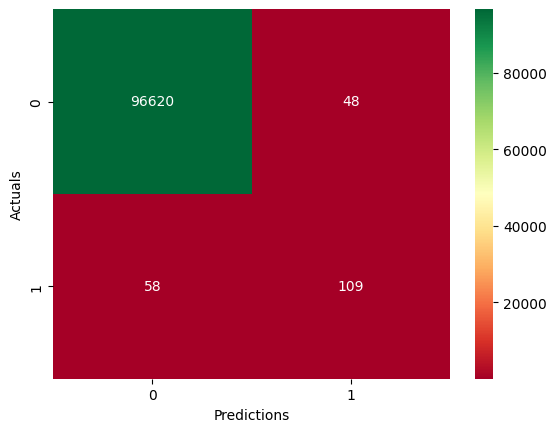

In [24]:
# Logistic Regression
mod = LogisticRegression(solver='lbfgs',max_iter=200)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

#print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##### The Logistic Regression gives us Recall value of .65 which is like out of 167 Frauds, Models picks only 58 as Fraud
##### Overall ROC Score is 82.609%, but Recall has to be improved for a better model

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian
- Power Transformer will be used here: Box-Cox method will throw error, hence used yeo-johnson which is the default method

In [25]:
#skewness removal
col = x_train.columns
pt=PowerTransformer(method='yeo-johnson',standardize=True)
x_train_pt=pt.fit_transform(x_train)
x_test_pt=pt.transform(x_test)
df_p=pd.DataFrame(x_train_pt,columns=col)

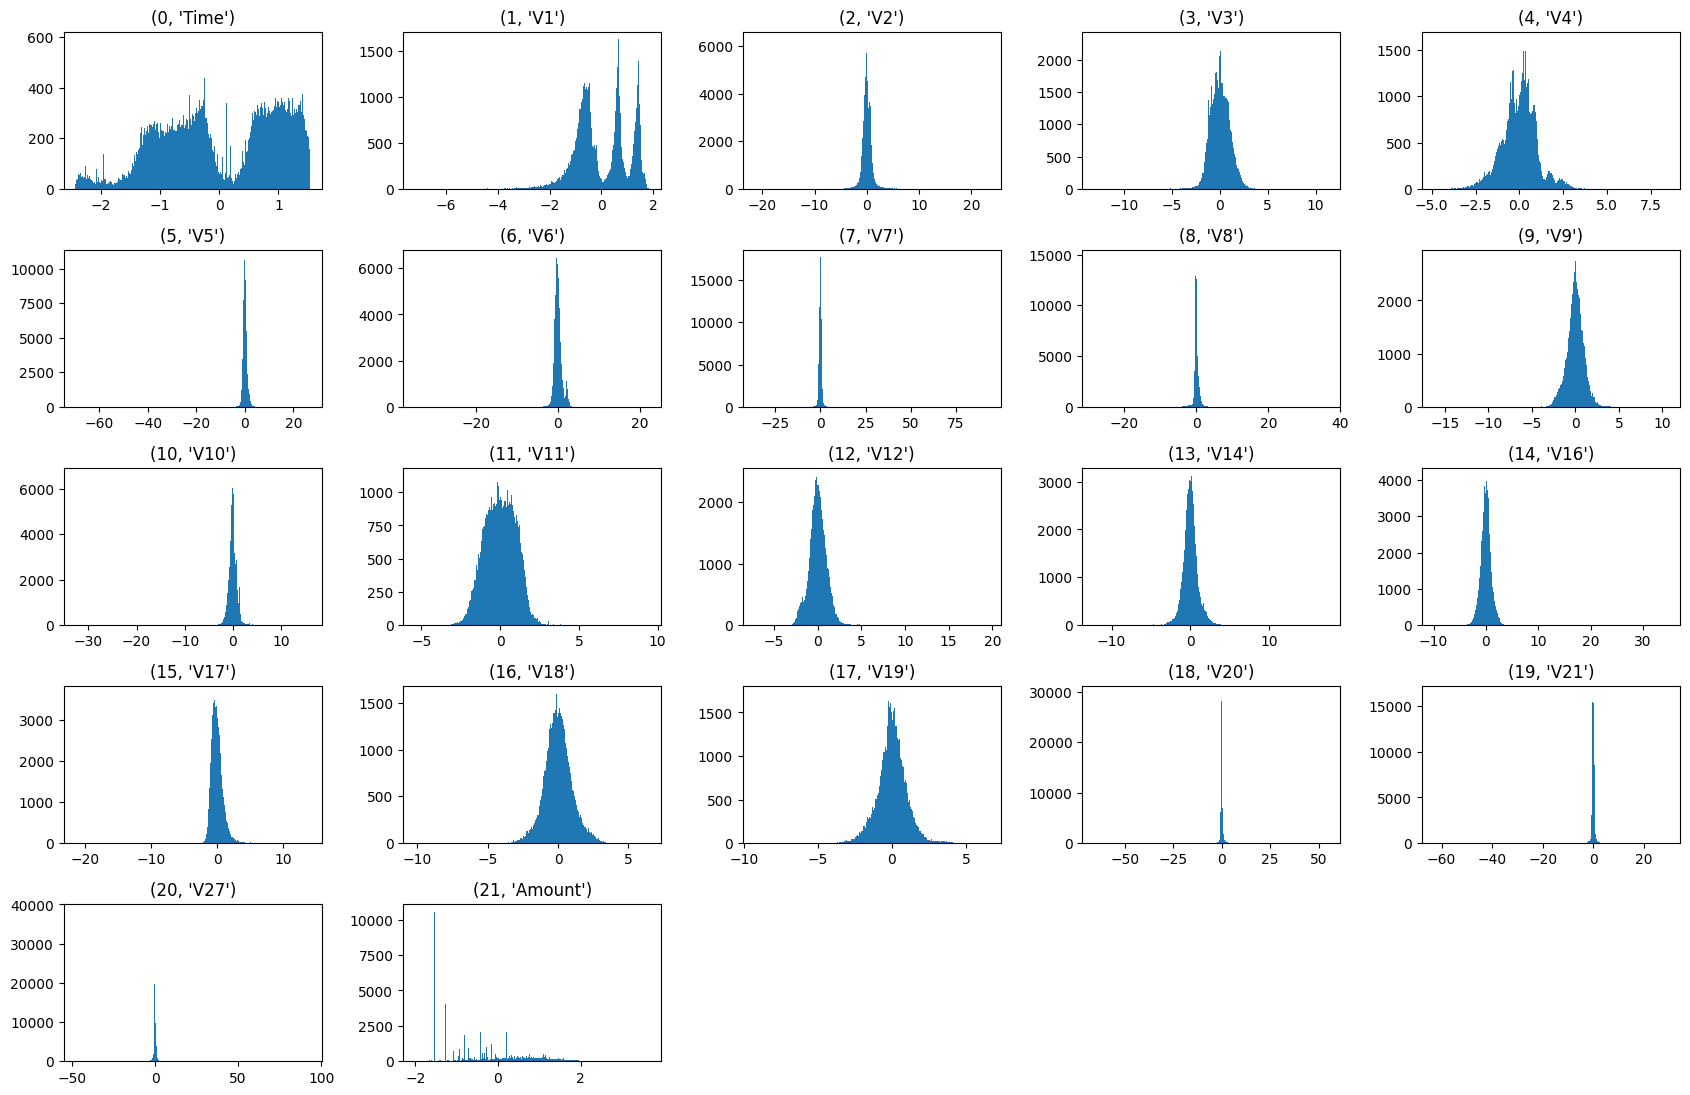

In [26]:
# plot the histogram of a variable from the dataset again to see the result
plt.figure(figsize=(17,13))
for i in list(enumerate(df_p.columns)):
    plt.subplot(6, 5, i[0]+1)
    plt.hist(x=df_p[i[1]],bins=1000)
    plt.title(i)
    #ax = sns.displot(x_train[i[1]], kde=True)
    #ax.set(xlabel= '', ylabel='Counts', title=i)
    #plt.show()
plt.tight_layout()
plt.show()

In [27]:
x_train_pt = pd.DataFrame(x_train_pt,columns=col)
x_test_pt = pd.DataFrame(x_test_pt,columns=col)
print(x_train_pt.head(),x_test_pt.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.186598  0.692364 -0.544972 -0.251266 -0.578087 -0.468829 -0.245443   
1  1.118276  1.343943 -0.371375 -0.383873  0.311505 -0.439301  0.038317   
2 -0.234412 -0.675745  0.691093  1.425211  0.381787  0.042826 -0.259721   
3 -1.635636  0.620450 -0.241330  0.682138 -0.352003 -0.636765 -0.115568   
4  1.295108  0.985485 -0.940128 -0.806139  0.465216 -0.446280  0.519269   

         V7        V8        V9  ...       V12       V14       V16       V17  \
0 -0.303454 -0.184312 -1.025966  ... -0.406136  0.060478  1.789370 -0.277166   
1 -0.563710  0.018284  1.095201  ...  1.410568 -0.133169  0.362996 -1.046476   
2  0.649116 -0.164852 -0.803080  ...  0.383328 -0.588930 -0.446579  0.755977   
3 -0.531334 -0.111731  2.438408  ... -1.178489  1.258918 -0.952035  0.979300   
4 -0.414521  0.034426 -0.375298  ...  0.159017  0.195569 -1.143765 -0.817445   

        V18       V19       V20       V21       V27    Amount  
0 -0

##### Logistic Regression post Power Transformation

Accuracy Score: 0.9991738524293902
Roc AUC Score: 0.7993339571529344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.88      0.60      0.71       167

    accuracy                           1.00     96835
   macro avg       0.94      0.80      0.86     96835
weighted avg       1.00      1.00      1.00     96835



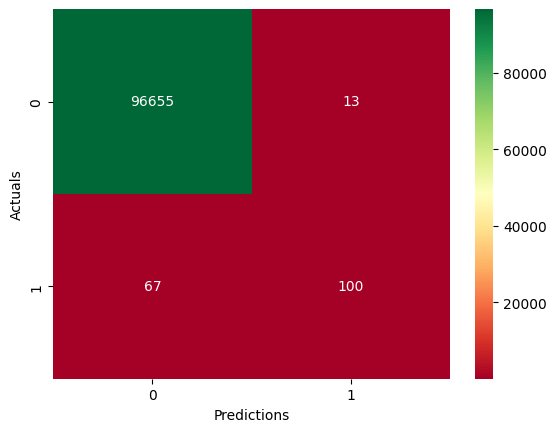

In [28]:
# Logistic Regression
mod = LogisticRegression(solver='lbfgs',max_iter=200)
mod.fit(x_train_pt,y_train)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

#print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##### - The Logistic Regression post Power Transformation gives us Recall value of .60 which is like out of 167 Frauds, Models picks only 67 as Fraud
##### - Overall ROC Score has gone down to 79.933%, also Recall has to be improved for a better model
##### - Next we'll try some cross validations with various regularizations

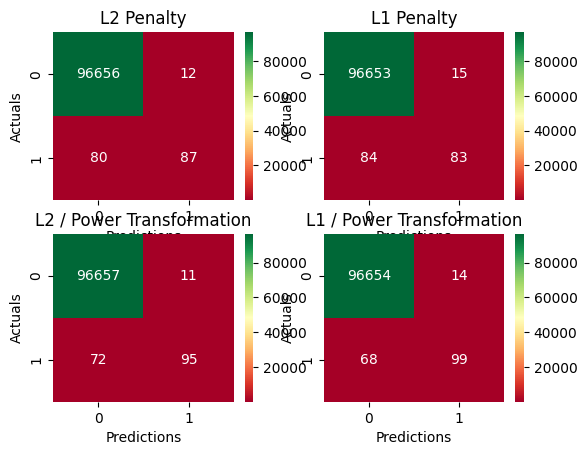

Accuracy Score for L2: 0.9990499302937987
Accuracy Score for L1: 0.9989776423813703
Accuracy Score for L2 with PT: 0.9991428718954923
Accuracy Score for L1 with PT: 0.999153198740125
Roc AUC Score for L2: 0.7604169738067623
Roc AUC Score for L1: 0.7484254088752194
Roc AUC Score for L2 with PT: 0.784374241957596
Roc AUC Score for L1 with PT: 0.7963347728344361
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.88      0.52      0.65       167

    accuracy                           1.00     96835
   macro avg       0.94      0.76      0.83     96835
weighted avg       1.00      1.00      1.00     96835

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.85      0.50      0.63       167

    accuracy                           1.00     96835
   macro avg       0.92      0.75      0.81     96835
weighted avg       1.00      1.00      

In [31]:
#perform cross validation
num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = StratifiedKFold(n_splits=12, shuffle=True, random_state=33)

#perform hyperparameter tuning
searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=33
          ,max_iter=200
          ,fit_intercept=True
          ,solver='lbfgs'
          ,tol=10)

searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=33
          ,max_iter=200
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10)

searchCV_l2_pt = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=33
          ,max_iter=200
          ,fit_intercept=True
          ,solver='lbfgs'
          ,tol=10)

searchCV_l1_pt = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=33
          ,max_iter=200
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10)

searchCV_l2.fit(x_train, y_train)
searchCV_l1.fit(x_train, y_train)
searchCV_l2_pt.fit(x_train_pt, y_train)
searchCV_l1_pt.fit(x_train_pt, y_train)

y_pred_l2 = searchCV_l2.predict(x_test)
y_pred_l1 = searchCV_l1.predict(x_test)
y_pred_l2_pt = searchCV_l2_pt.predict(x_test_pt)
y_pred_l1_pt = searchCV_l1_pt.predict(x_test_pt)

cm_l2 = confusion_matrix(y_test, y_pred_l2)
cm_l1 = confusion_matrix(y_test, y_pred_l1)
cm_l2_pt = confusion_matrix(y_test, y_pred_l2_pt)
cm_l1_pt = confusion_matrix(y_test, y_pred_l1_pt)

plt.subplot(2,2,1)
sns.heatmap(cm_l2, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('L2 Penalty')

plt.subplot(2,2,2)
sns.heatmap(cm_l1, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('L1 Penalty')

plt.subplot(2,2,3)
sns.heatmap(cm_l2_pt, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('L2 / Power Transformation')

plt.subplot(2,2,4)
sns.heatmap(cm_l1_pt, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('L1 / Power Transformation')

plt.show()

#print(cm)
print("Accuracy Score for L2:", accuracy_score(y_test, y_pred_l2))
print("Accuracy Score for L1:", accuracy_score(y_test, y_pred_l1))
print("Accuracy Score for L2 with PT:", accuracy_score(y_test, y_pred_l2_pt))
print("Accuracy Score for L1 with PT:", accuracy_score(y_test, y_pred_l1_pt))


print("Roc AUC Score for L2:", roc_auc_score(y_test, y_pred_l2))
print("Roc AUC Score for L1:", roc_auc_score(y_test, y_pred_l1))
print("Roc AUC Score for L2 with PT:", roc_auc_score(y_test, y_pred_l2_pt))
print("Roc AUC Score for L1 with PT:", roc_auc_score(y_test, y_pred_l1_pt))

print(classification_report(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l2_pt))
print(classification_report(y_test, y_pred_l1_pt))

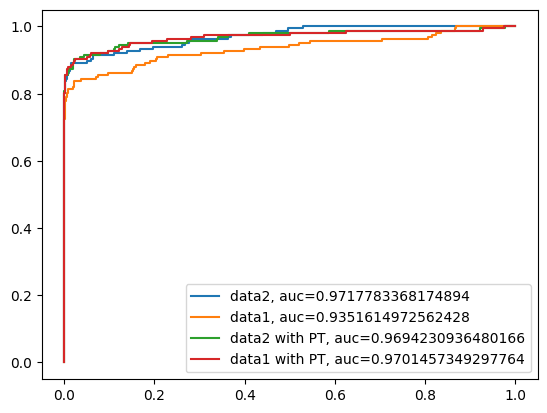

In [32]:
y_pred_prob_l2 = searchCV_l2.predict_proba(x_test)[::,1]
y_pred_prob_l1 = searchCV_l1.predict_proba(x_test)[::,1]
y_pred_prob_l2_pt = searchCV_l2_pt.predict_proba(x_test_pt)[::,1]
y_pred_prob_l1_pt = searchCV_l1_pt.predict_proba(x_test_pt)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_prob_l2)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_prob_l1)
fpr2_pt, tpr2_pt, _ = metrics.roc_curve(y_test,  y_pred_prob_l2_pt)
fpr1_pt, tpr1_pt, _ = metrics.roc_curve(y_test,  y_pred_prob_l1_pt)
auc2 = metrics.roc_auc_score(y_test, y_pred_prob_l2)
auc1 = metrics.roc_auc_score(y_test, y_pred_prob_l1)
auc2_pt = metrics.roc_auc_score(y_test, y_pred_prob_l2_pt)
auc1_pt = metrics.roc_auc_score(y_test, y_pred_prob_l1_pt)
plt.plot(fpr2,tpr2,label="data2, auc="+str(auc2))
plt.plot(fpr1,tpr1,label="data1, auc="+str(auc1))
plt.plot(fpr2_pt,tpr2_pt,label="data2 with PT, auc="+str(auc2_pt))
plt.plot(fpr1_pt,tpr1_pt,label="data1 with PT, auc="+str(auc1_pt))
plt.legend(loc=4)
plt.show()

- <b>Logistic Regression with L1 And L2 Regularisation with Cross validations
- <b>It appears Logistic Regression's performance is not getting much tampered because of Regularization
- <b>The Recall value keeps on shuffing between 0.50 to 0.59 which was the case without PT or Regularization
- <b>L1 Regularization with Power Transformation gives best result with ROC of 79.633%

### Similarly explore other algorithms by building models like:
- SVM
- Decision Tree
- Random Forest
- XGBoost

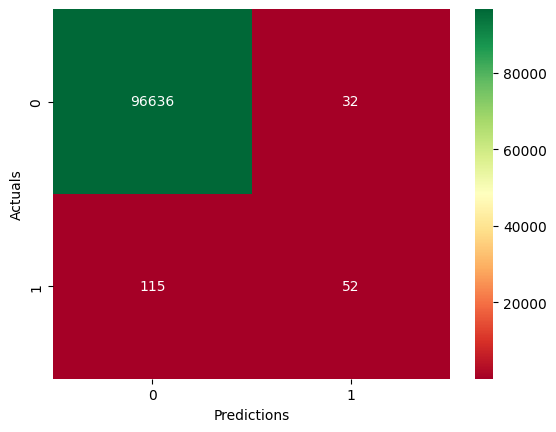

Accuracy Score: 0.9984819538390045
Roc AUC Score: 0.6555231077960767
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.62      0.31      0.41       167

    accuracy                           1.00     96835
   macro avg       0.81      0.66      0.71     96835
weighted avg       1.00      1.00      1.00     96835



In [33]:
# SVM 1
svm1 = SVC(kernel='linear',gamma='auto')
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

cm1 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm1, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

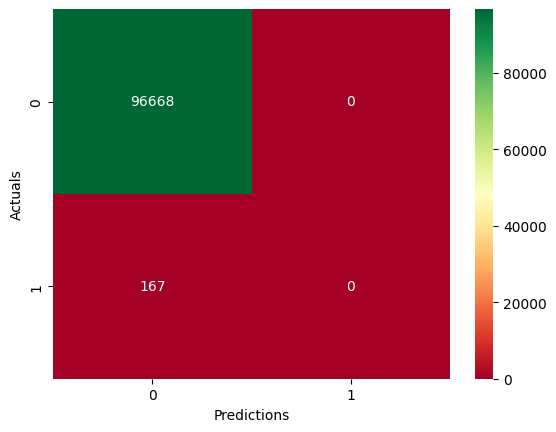

Accuracy Score: 0.998275416946352
Roc AUC Score: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.00      0.00      0.00       167

    accuracy                           1.00     96835
   macro avg       0.50      0.50      0.50     96835
weighted avg       1.00      1.00      1.00     96835



In [34]:
# SVM 2
svm2 = SVC(kernel='rbf',gamma='scale')
svm2.fit(x_train,y_train)
y_pred = svm2.predict(x_test)

cm2 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm2, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

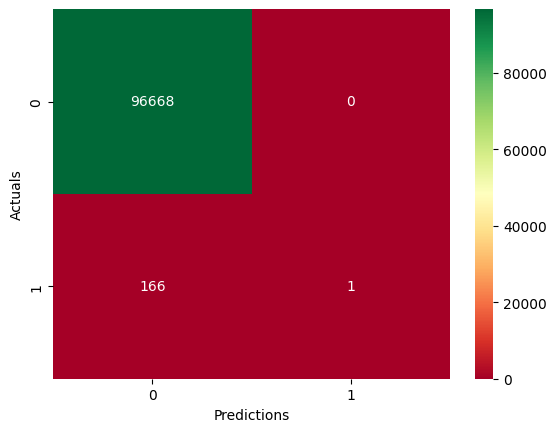

Accuracy Score: 0.9982857437909847
Roc AUC Score: 0.5029940119760479
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       1.00      0.01      0.01       167

    accuracy                           1.00     96835
   macro avg       1.00      0.50      0.51     96835
weighted avg       1.00      1.00      1.00     96835



In [35]:
# SVM 3
svm3 = SVC(kernel='sigmoid',gamma='auto')
svm3.fit(x_train,y_train)
y_pred = svm3.predict(x_test)

cm3 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm3, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

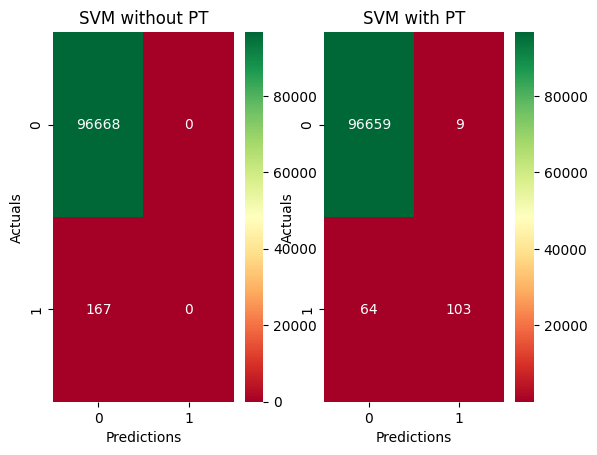

Accuracy Score: 0.998275416946352
Accuracy Score with PT: 0.9992461403418186
Roc AUC Score: 0.5
Roc AUC Score with PT: 0.8083366824508801
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.00      0.00      0.00       167

    accuracy                           1.00     96835
   macro avg       0.50      0.50      0.50     96835
weighted avg       1.00      1.00      1.00     96835

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.92      0.62      0.74       167

    accuracy                           1.00     96835
   macro avg       0.96      0.81      0.87     96835
weighted avg       1.00      1.00      1.00     96835



In [36]:
# SVM with PT 
svm = SVC()
svm_pt = SVC()

svm.fit(x_train,y_train)
svm_pt.fit(x_train_pt,y_train)

y_pred = svm.predict(x_test)
y_pred_pt = svm_pt.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)
cm_pt = confusion_matrix(y_test, y_pred_pt)

plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('SVM without PT')

plt.subplot(1,2,2)
sns.heatmap(cm_pt, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('SVM with PT')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Accuracy Score with PT:", accuracy_score(y_test, y_pred_pt))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print("Roc AUC Score with PT:", roc_auc_score(y_test, y_pred_pt))
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_pt))

- SVM with various Kernels & Power Transformation doesn't gives better results
- However SVM with Power Transformation & default hyper parameters gives ROC Score of 80.833% with Recall of 0.62

##### Decision Tree

gini score: 0.9992048329632881
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.77      0.77      0.77       167

    accuracy                           1.00     96835
   macro avg       0.88      0.89      0.88     96835
weighted avg       1.00      1.00      1.00     96835

gini tree_roc_value: 0.8860258235546121
Tree threshold: 1.0
ROC for the test dataset 88.6%


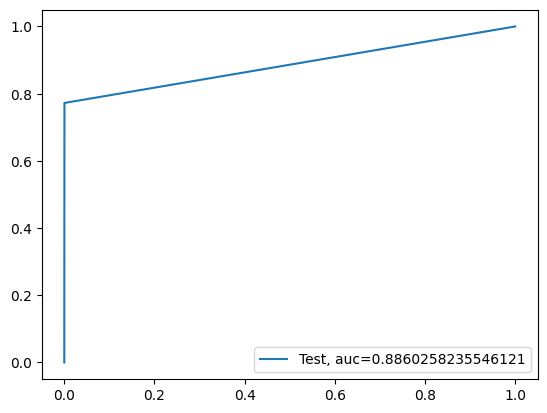

entropy score: 0.9991841792740228
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.75      0.79      0.77       167

    accuracy                           1.00     96835
   macro avg       0.87      0.89      0.88     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.8949819977705036
Tree threshold: 1.0
ROC for the test dataset 89.5%


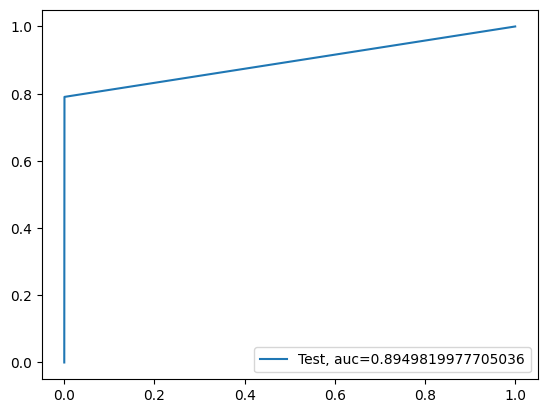

In [37]:
# Decision Tree 1
# With Power Transformation
criteria = ['gini', 'entropy'] 
scores = {} 
    
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c, random_state=22) 
    dt.fit(x_train_pt, y_train) 
    y_pred = dt.predict(x_test_pt)
    test_score = dt.score(x_test_pt, y_test) 
    tree_preds = dt.predict_proba(x_test_pt)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score 
    print(c + " score: {0}" .format(test_score))
    print("Confusion Matrix")
    confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c + " tree_roc_value: {0}" .format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

- <b>Decision Tree/Gini with Power Transformation gives ROC of 88.602% & Recall of 0.77
- <b>Decision Tree/Entropy with Power Transformation gives ROC of 89.498% & Recall of 0.79

gini score: 0.9992048329632881
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.77      0.77      0.77       167

    accuracy                           1.00     96835
   macro avg       0.88      0.89      0.88     96835
weighted avg       1.00      1.00      1.00     96835

gini tree_roc_value: 0.8860258235546121
Tree threshold: 1.0
ROC for the test dataset 88.6%


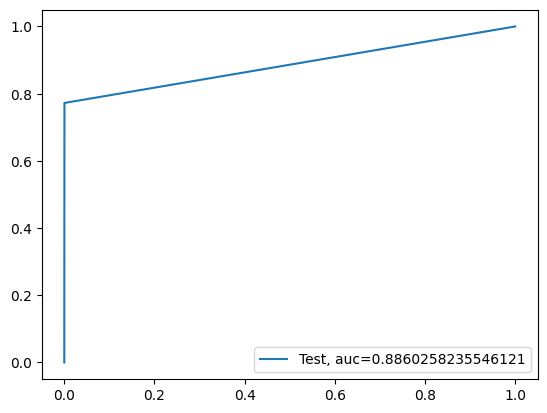

entropy score: 0.9991635255847576
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.74      0.79      0.77       167

    accuracy                           1.00     96835
   macro avg       0.87      0.89      0.88     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.8949716530856028
Tree threshold: 1.0
ROC for the test dataset 89.5%


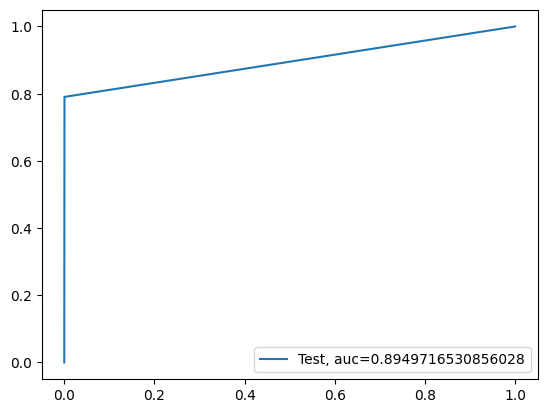

In [38]:
# Decision Tree 2
# Without Power Transformation

criteria = ['gini', 'entropy'] 
scores = {} 
    
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c, random_state=22) 
    dt.fit(x_train, y_train) 
    y_pred = dt.predict(x_test)
    test_score = dt.score(x_test, y_test) 
    tree_preds = dt.predict_proba(x_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score 
    print(c + " score: {0}" .format(test_score))
    print("Confusion Matrix")
    confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c + " tree_roc_value: {0}" .format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

- <b>Decision Tree/Gini without Power Transformation gives ROC of 88.602% & Recall of 0.77
- <b>Decision Tree/Entropy without Power Transformation gives ROC of 89.497% & Recall of 0.79

gini score: 0.9993287550988795
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.83      0.77      0.80       167

    accuracy                           1.00     96835
   macro avg       0.92      0.88      0.90     96835
weighted avg       1.00      1.00      1.00     96835

gini tree_roc_value: 0.870297442521338
Tree threshold: 0.0016178611875101116
ROC for the test dataset 87.0%


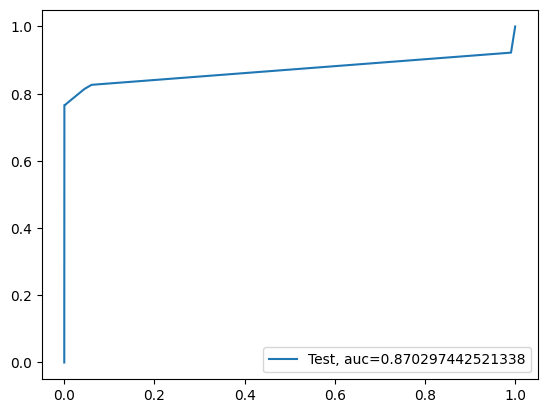

entropy score: 0.9993184282542469
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.83      0.77      0.80       167

    accuracy                           1.00     96835
   macro avg       0.91      0.88      0.90     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.9083299553084835
Tree threshold: 0.0025940337224383916
ROC for the test dataset 90.8%


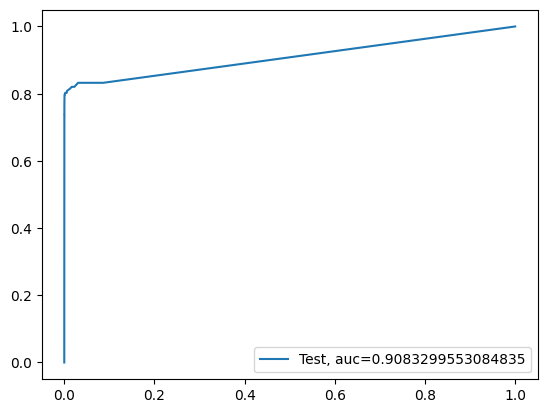

In [39]:
# Decision Tree 3
# Changing Hyperparameters from default 

criteria = ['gini', 'entropy'] 
scores = {} 
    
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c, random_state=22,max_depth=10,max_features=7) 
    dt.fit(x_train, y_train) 
    y_pred = dt.predict(x_test)
    test_score = dt.score(x_test, y_test) 
    tree_preds = dt.predict_proba(x_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score 
    print(c + " score: {0}" .format(test_score))
    print("Confusion Matrix")
    confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c + " tree_roc_value: {0}" .format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

- Decision Trees are giving good results ROC of 89.497% but has high chance of overfitting
- Also Power Transformation / Without Power Transformation doesnt really contributing anything here
- Some hyper parameters helps to improve but not very efficient

##### Random Forest

entropy score: 0.9994939846130015
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.92      0.78      0.84       167

    accuracy                           1.00     96835
   macro avg       0.96      0.89      0.92     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.9445950446109891
Tree threshold: 0.02
ROC for the test dataset 94.5%


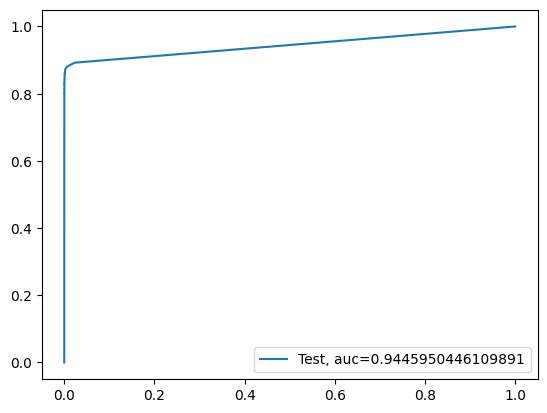

In [40]:
# Random Forest 1
# Without Power transformation
scores = {} 
    
dt = RandomForestClassifier() 
dt.fit(x_train, y_train) 
y_pred = dt.predict(x_test)
test_score = dt.score(x_test, y_test) 
tree_preds = dt.predict_proba(x_test)[:, 1]
tree_roc_value = roc_auc_score(y_test, tree_preds)
scores = test_score 
print(c + " score: {0}" .format(test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
print(c + " tree_roc_value: {0}" .format(tree_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Tree threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

entropy score: 0.999535291991532
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.93      0.79      0.85       167

    accuracy                           1.00     96835
   macro avg       0.96      0.90      0.93     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.9475693273526601
Tree threshold: 0.01
ROC for the test dataset 94.8%


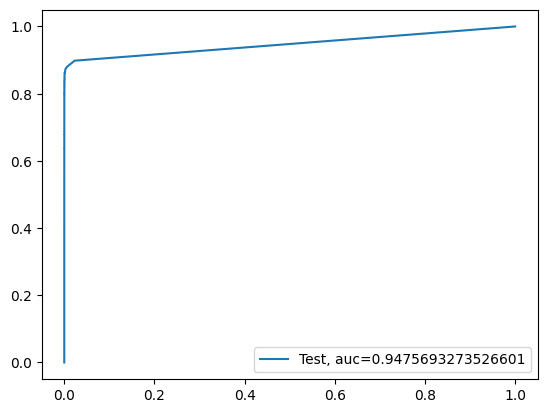

In [41]:
# Random Forest 2
# With Power transformation
scores = {} 
    
dt = RandomForestClassifier() 
dt.fit(x_train_pt, y_train) 
y_pred = dt.predict(x_test_pt)
test_score = dt.score(x_test_pt, y_test) 
tree_preds = dt.predict_proba(x_test_pt)[:, 1]
tree_roc_value = roc_auc_score(y_test, tree_preds)
scores = test_score 
print(c + " score: {0}" .format(test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
print(c + " tree_roc_value: {0}" .format(tree_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Tree threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

entropy score: 0.9994010430113079
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.90      0.74      0.81       167

    accuracy                           1.00     96835
   macro avg       0.95      0.87      0.90     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.9748937594666256
Tree threshold: 0.008241977654329803
ROC for the test dataset 97.5%


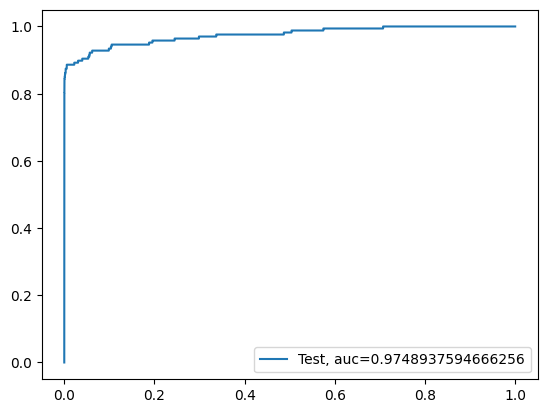

In [42]:
# Random Forest 3
# With Power transformation
scores = {} 
    
dt = RandomForestClassifier(n_estimators=90,max_depth=10,min_samples_leaf=5) 
dt.fit(x_train_pt, y_train) 
y_pred = dt.predict(x_test_pt)
test_score = dt.score(x_test_pt, y_test) 
tree_preds = dt.predict_proba(x_test_pt)[:, 1]
tree_roc_value = roc_auc_score(y_test, tree_preds)
scores = test_score 
print(c + " score: {0}" .format(test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
print(c + " tree_roc_value: {0}" .format(tree_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Tree threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

- Random Forest without PT gives ROC of 94.459% with Recall value of 0.78
- Random Forest with PT gives ROC of 94.756% with Recall value of 0.79
- Random Forest with diff param gives ROC of 97.489% with Recall value of 0.74

##### XGBoost

Model Accuracy: 0.9995559456807972
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.94      0.80      0.86       167

    accuracy                           1.00     96835
   macro avg       0.97      0.90      0.93     96835
weighted avg       1.00      1.00      1.00     96835

XGboost roc_value: 0.9735957183163362
XGBoost threshold: 0.0014485028805211186
ROC for the test dataset 97.4%


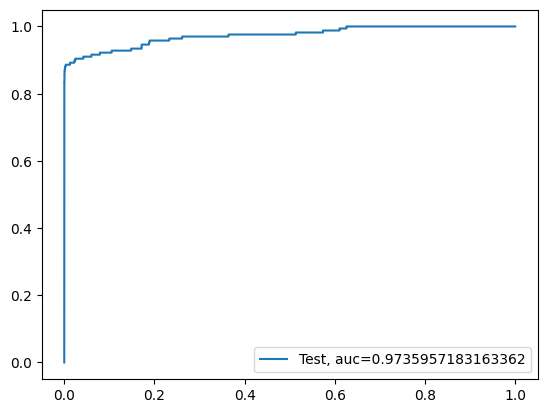

In [43]:
# XGBoost without PT
XGBmodel = XGBClassifier(random_state=22)
XGBmodel.fit(x_train, y_train)
y_pred = XGBmodel.predict(x_test)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Model Accuracy: 0.9995559456807972
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.94      0.80      0.86       167

    accuracy                           1.00     96835
   macro avg       0.97      0.90      0.93     96835
weighted avg       1.00      1.00      1.00     96835

XGboost roc_value: 0.9735959660932201
XGBoost threshold: 0.0014485002029687166
ROC for the test dataset 97.4%


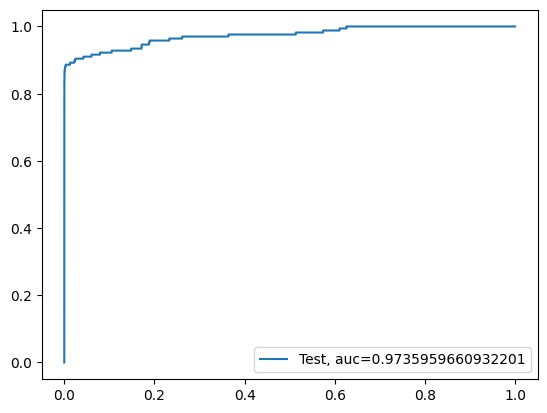

In [44]:
# XGBoost with PT
XGBmodel = XGBClassifier(random_state=22)
XGBmodel.fit(x_train_pt, y_train)
y_pred = XGBmodel.predict(x_test_pt)

XGB_test_score = XGBmodel.score(x_test_pt, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test_pt)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

- XGBoost with/without PT gives 97.359% ROC Score on Testing data with 0.80 as Recall
- ROC of XGboost is highest, amongst Logistic Regression, SVM, Decision Tree & Random Forest

## Model building with balancing Classes

##### Perform class balancing with :
- Random Over Sampling
- Random Under Sampling
- SMOTE
- ADASYN

- ##### Until now all our experiments were based on imbalanced data
- ##### This time we'll run our models post fixing data imbalance
- ##### Also we'll use with Power Transformed data, as there's not much diff

In [48]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform on power transformed data
x_over, y_over = oversample.fit_resample(x_train, y_train)

# summarize class distribution
print(x_over.shape,y_over.shape)
print(y_over.value_counts())

(375294, 22) (375294,)
Class
0    187647
1    187647
Name: count, dtype: int64


Accuracy Score: 0.9641555222801673
Roc AUC Score: 0.9312365255833349
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     96668
           1       0.04      0.90      0.08       167

    accuracy                           0.96     96835
   macro avg       0.52      0.93      0.53     96835
weighted avg       1.00      0.96      0.98     96835



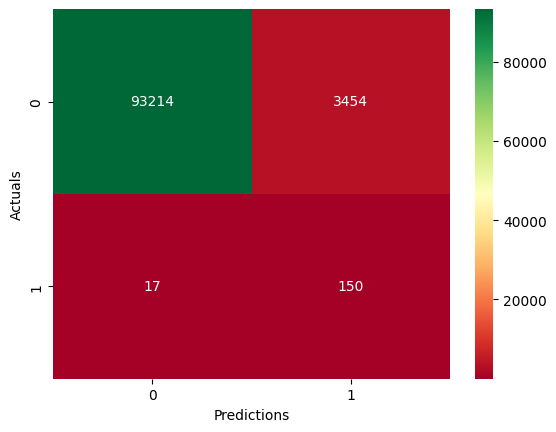

In [54]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_over,y_over)
y_pred = lr.predict(x_test)

cm_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_lr, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')


#print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

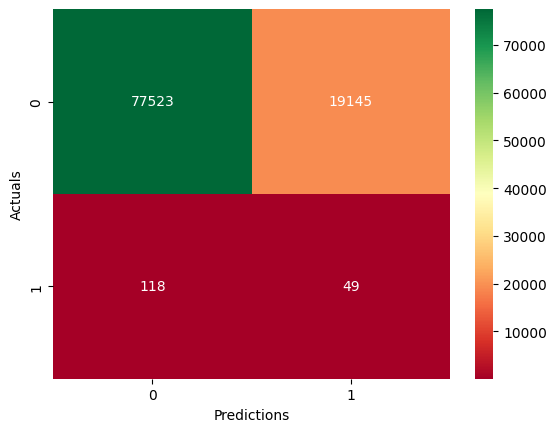

Accuracy Score: 0.8010739918417927
Roc AUC Score: 0.5476820906125018
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     96668
           1       0.00      0.29      0.01       167

    accuracy                           0.80     96835
   macro avg       0.50      0.55      0.45     96835
weighted avg       1.00      0.80      0.89     96835



In [55]:
# SVM
svm = SVC()
svm.fit(x_over,y_over)
y_pred = svm.predict(x_test)

cm_svm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_svm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

gini score: 0.9991635255847576
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.78      0.71      0.75       167

    accuracy                           1.00     96835
   macro avg       0.89      0.86      0.87     96835
weighted avg       1.00      1.00      1.00     96835

gini tree_roc_value: 0.8561167378488357
Tree threshold: 1.0
ROC for the test dataset 85.6%


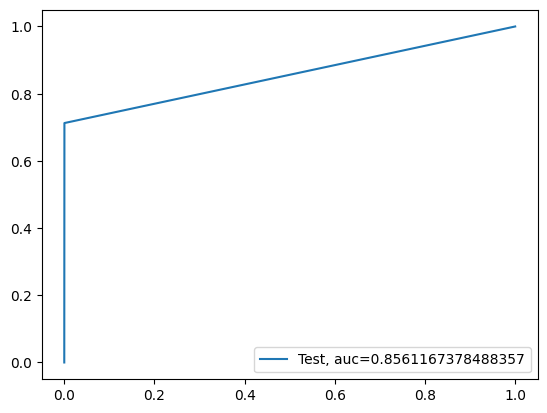

entropy score: 0.9990809108276966
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.73      0.75      0.74       167

    accuracy                           1.00     96835
   macro avg       0.86      0.87      0.87     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.874008396910817
Tree threshold: 1.0
ROC for the test dataset 87.4%


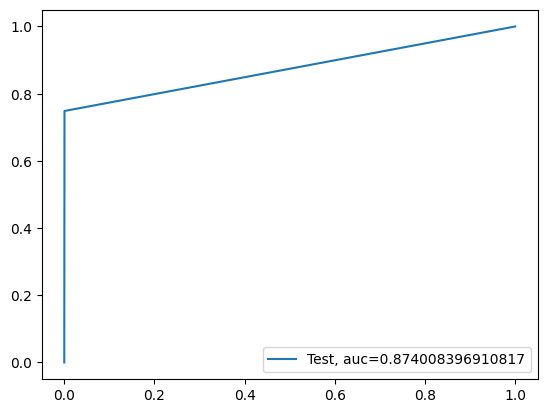

In [56]:
# Decision Tree
criteria = ['gini', 'entropy'] 
scores = {} 
    
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c, random_state=21) 
    dt.fit(x_over, y_over) 
    y_pred = dt.predict(x_test)
    test_score = dt.score(x_test, y_test) 
    tree_preds = dt.predict_proba(x_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score 
    print(c + " score: {0}" .format(test_score))
    print("Confusion Matrix")
    confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c + " tree_roc_value: {0}" .format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

entropy score: 0.9994836577683689
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.91      0.78      0.84       167

    accuracy                           1.00     96835
   macro avg       0.95      0.89      0.92     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.9414882012364562
Tree threshold: 0.03
ROC for the test dataset 94.1%


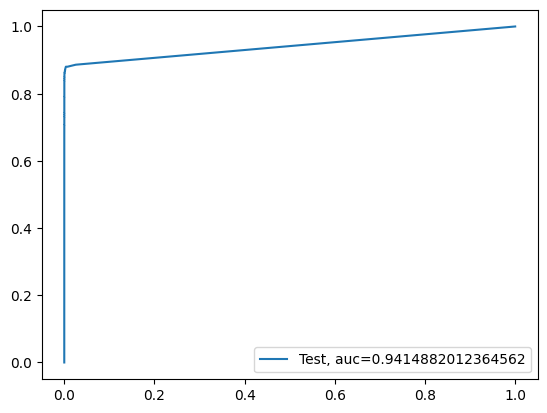

In [57]:
# Random Forest 
scores = {} 
    
rf = RandomForestClassifier() 
rf.fit(x_over, y_over) 
y_pred = rf.predict(x_test)
test_score = rf.score(x_test, y_test) 
tree_preds = rf.predict_proba(x_test)[:, 1]
tree_roc_value = roc_auc_score(y_test, tree_preds)
scores = test_score 
print(c + " score: {0}" .format(test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
print(c + " tree_roc_value: {0}" .format(tree_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Tree threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Model Accuracy: 0.9995146383022667
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.89      0.82      0.85       167

    accuracy                           1.00     96835
   macro avg       0.94      0.91      0.93     96835
weighted avg       1.00      1.00      1.00     96835

XGboost roc_value: 0.9754291433684128
XGBoost threshold: 7.73834326537326e-05
ROC for the test dataset 97.5%


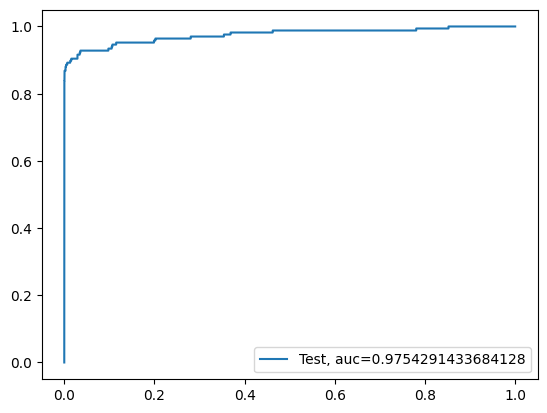

In [58]:
# XGBoost
XGBmodel = XGBClassifier(random_state=21)
XGBmodel.fit(x_over, y_over)
y_pred = XGBmodel.predict(x_test)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

- Logistic - ROC (93.123%) - Recall (0.90)
- SVM - ROC (54.768%) - Recall (0.29)
- Decision Tree - ROC (87.400%) - Recall (0.75) / (Gini)
- Random Forest - ROC (94.148%) - Recall (0.78)
- XGBoost - ROC (97.542%) - Recall (0.82)

##### XGBoost appears to be the best model for Random Over Sampling, however Logistic Regression has more Recall value

In [59]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
x_under, y_under = undersample.fit_resample(x_train, y_train)
# summarize class distribution
print(x_under.shape,y_under.shape)
print(y_under.value_counts())

(650, 22) (650,)
Class
0    325
1    325
Name: count, dtype: int64


Accuracy Score: 0.9558424123509062
Roc AUC Score: 0.9270727899107235
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     96668
           1       0.03      0.90      0.07       167

    accuracy                           0.96     96835
   macro avg       0.52      0.93      0.52     96835
weighted avg       1.00      0.96      0.98     96835



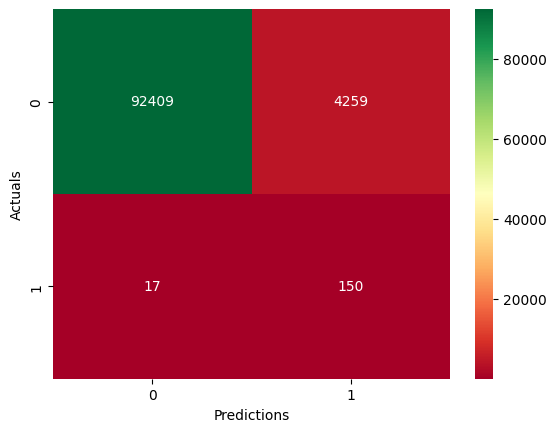

In [60]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_under,y_under)
y_pred = lr.predict(x_test)

cm_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_lr, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

#print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

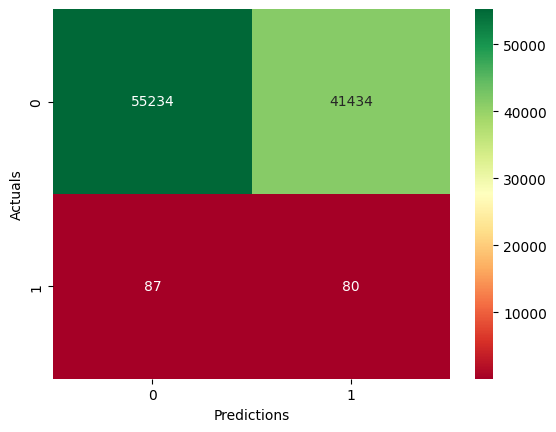

Accuracy Score: 0.5712190840088811
Roc AUC Score: 0.5252101209919302
              precision    recall  f1-score   support

           0       1.00      0.57      0.73     96668
           1       0.00      0.48      0.00       167

    accuracy                           0.57     96835
   macro avg       0.50      0.53      0.37     96835
weighted avg       1.00      0.57      0.73     96835



In [61]:
# SVM
svm = SVC()
svm.fit(x_under,y_under)
y_pred = svm.predict(x_test)

cm_svm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_svm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

gini score: 0.9061599628233593
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     96668
           1       0.02      0.89      0.03       167

    accuracy                           0.91     96835
   macro avg       0.51      0.90      0.49     96835
weighted avg       1.00      0.91      0.95     96835

gini tree_roc_value: 0.8991998107480161
Tree threshold: 1.0
ROC for the test dataset 89.9%


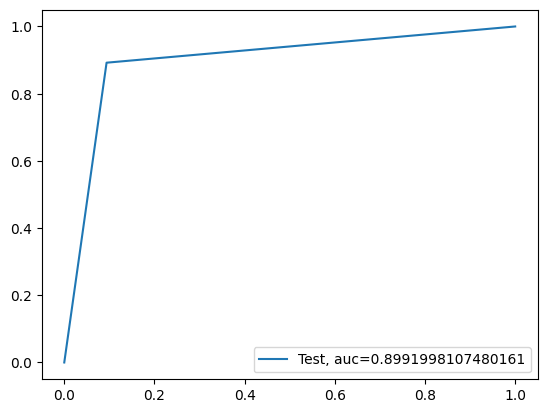

entropy score: 0.905674601125626
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     96668
           1       0.02      0.89      0.03       167

    accuracy                           0.91     96835
   macro avg       0.51      0.90      0.49     96835
weighted avg       1.00      0.91      0.95     96835

entropy tree_roc_value: 0.8959678710192476
Tree threshold: 1.0
ROC for the test dataset 89.6%


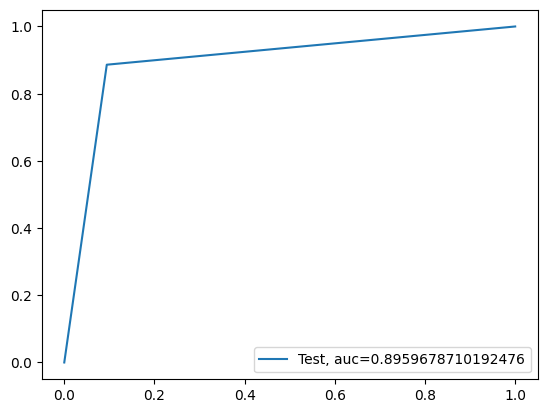

In [62]:
# Decision Tree
criteria = ['gini', 'entropy'] 
scores = {} 
    
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c, random_state=43) 
    dt.fit(x_under, y_under) 
    y_pred = dt.predict(x_test)
    test_score = dt.score(x_test, y_test) 
    tree_preds = dt.predict_proba(x_test)[:, 1]
    tree_roc_value = roc_auc_score(y_test, tree_preds)
    scores = test_score 
    print(c + " score: {0}" .format(test_score))
    print("Confusion Matrix")
    confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c + " tree_roc_value: {0}" .format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

entropy score: 0.9795218670935095
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     96668
           1       0.07      0.90      0.13       167

    accuracy                           0.98     96835
   macro avg       0.54      0.94      0.56     96835
weighted avg       1.00      0.98      0.99     96835

entropy tree_roc_value: 0.9832144169475424
Tree threshold: 0.5
ROC for the test dataset 98.3%


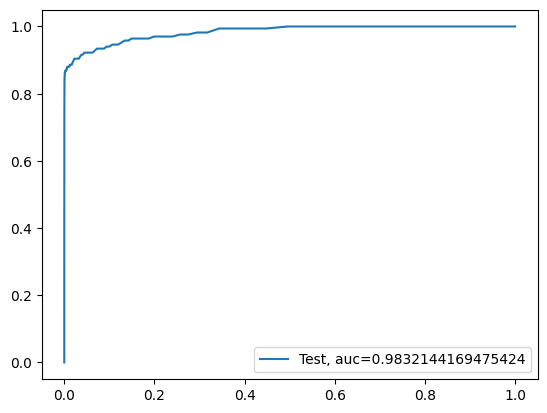

In [63]:
# Random Forest 
scores = {} 
    
rf = RandomForestClassifier() 
rf.fit(x_under, y_under) 
y_pred = rf.predict(x_test)
test_score = rf.score(x_test, y_test) 
tree_preds = rf.predict_proba(x_test)[:, 1]
tree_roc_value = roc_auc_score(y_test, tree_preds)
scores = test_score 
print(c + " score: {0}" .format(test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
print(c + " tree_roc_value: {0}" .format(tree_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Tree threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Model Accuracy: 0.9682242990654205
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     96668
           1       0.05      0.90      0.09       167

    accuracy                           0.97     96835
   macro avg       0.52      0.94      0.54     96835
weighted avg       1.00      0.97      0.98     96835

XGboost roc_value: 0.9813427103669105
XGBoost threshold: 0.4485775828361511
ROC for the test dataset 98.1%


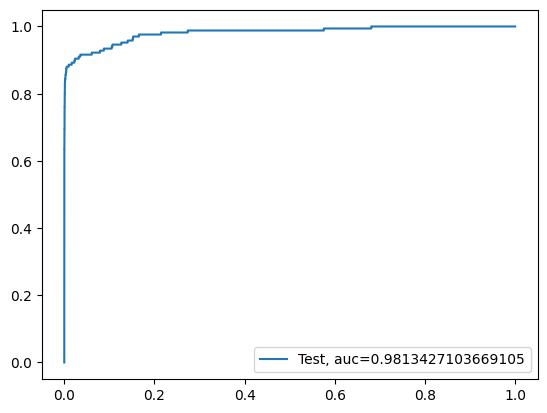

In [64]:
# XGBoost
XGBmodel = XGBClassifier(random_state=25)
XGBmodel.fit(x_under, y_under)
y_pred = XGBmodel.predict(x_test)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

- Logistic - ROC (92.707%) - Recall (0.90)
- SVM - ROC (52.521%) - Recall (0.48)
- Decision Tree - ROC (89.919%) - Recall (0.89) / (Entropy)
- Random Forest - ROC (98.321%) - Recall (0.90)
- XGBoost - ROC (98.134%) - Recall (0.90)

- ##### With under-sampling XGBoost & Random Forest both appears to be equally good
- ##### However, under sampling will loose out a lot on Majority class's information, very we'll avoid this
- ##### Lets try out SMOTE & ADASYN technique on only Logistic, Random Forest & XGBoost

In [67]:
# define SMOTE strategy
SMOTE = SMOTE(random_state=36)

# fit and apply the transform
x_train_Smote, y_train_Smote= SMOTE.fit_resample(x_train, y_train) 
# summarize class distribution
print(x_train_Smote.shape,y_train_Smote.shape)
print(y_train_Smote.value_counts())

(375294, 22) (375294,)
Class
0    187647
1    187647
Name: count, dtype: int64


Accuracy Score: 0.9686580265399907
Roc AUC Score: 0.9185474687237435
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     96668
           1       0.05      0.87      0.09       167

    accuracy                           0.97     96835
   macro avg       0.52      0.92      0.54     96835
weighted avg       1.00      0.97      0.98     96835



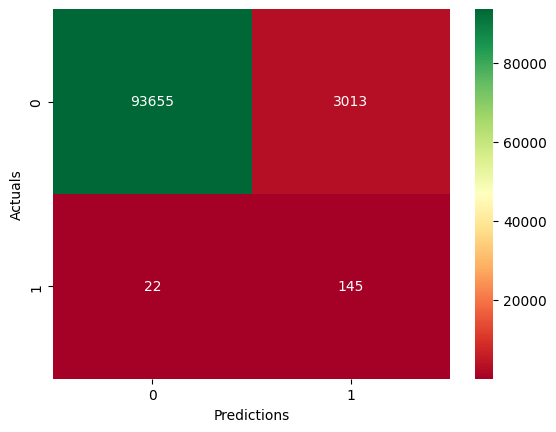

In [68]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_Smote,y_train_Smote)
y_pred = lr.predict(x_test)

cm_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_lr, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

#print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

entropy score: 0.9994113698559405
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.83      0.83      0.83       167

    accuracy                           1.00     96835
   macro avg       0.91      0.92      0.91     96835
weighted avg       1.00      1.00      1.00     96835

entropy tree_roc_value: 0.9582989336426249
Tree threshold: 0.04
ROC for the test dataset 95.8%


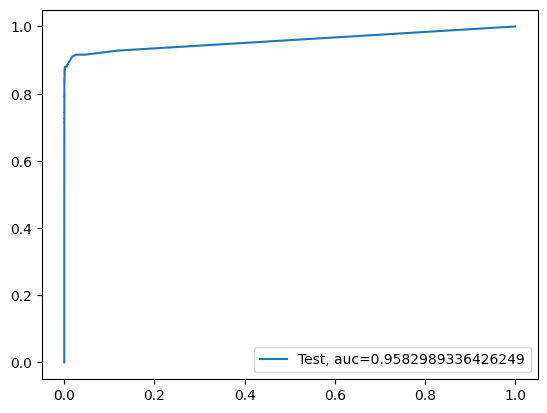

In [69]:
# Random Forest 
scores = {} 
    
rf = RandomForestClassifier() 
rf.fit(x_train_Smote, y_train_Smote) 
y_pred = rf.predict(x_test)
test_score = rf.score(x_test, y_test) 
tree_preds = rf.predict_proba(x_test)[:, 1]
tree_roc_value = roc_auc_score(y_test, tree_preds)
scores = test_score 
print(c + " score: {0}" .format(test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
print(c + " tree_roc_value: {0}" .format(tree_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Tree threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Model Accuracy: 0.9992461403418186
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.75      0.84      0.79       167

    accuracy                           1.00     96835
   macro avg       0.87      0.92      0.90     96835
weighted avg       1.00      1.00      1.00     96835

XGboost roc_value: 0.9692549770323218
XGBoost threshold: 0.005290989298373461
ROC for the test dataset 96.9%


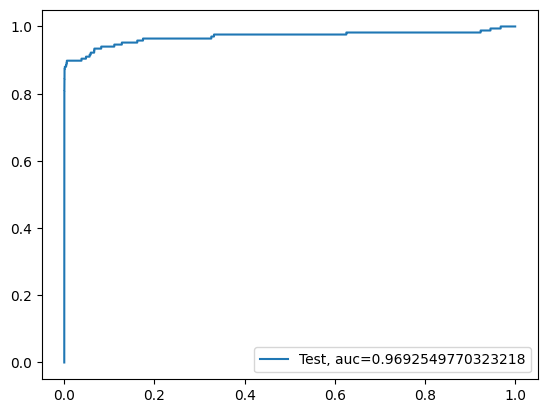

In [70]:
# XGBoost
XGBmodel = XGBClassifier()
XGBmodel.fit(x_train_Smote, y_train_Smote)
y_pred = XGBmodel.predict(x_test)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

- Logistic - ROC (91.854%) - Recall (0.87)
- Random Forest - ROC (95.829%) - Recall (0.83)
- XGBoost - ROC (96.925%) - Recall (0.84)

- ##### Smote appears to be the best data imbalance technique until now, with XGBoost giving highest ROC Score
- ##### Will see how XGBost performs with ADASYN, compared to SMOTE

In [71]:
# define ADASYN strategy
ADASYN = ADASYN(random_state=20)

# fit and apply the transform
x_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(x_train, y_train) 
# summarize class distribution
print(x_train_ADASYN.shape,y_train_ADASYN.shape)
print(y_train_ADASYN.value_counts())

(375277, 22) (375277,)
Class
0    187647
1    187630
Name: count, dtype: int64


Model Accuracy: 0.9992667940310838
Confusion Matrix
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.76      0.84      0.80       167

    accuracy                           1.00     96835
   macro avg       0.88      0.92      0.90     96835
weighted avg       1.00      1.00      1.00     96835

XGboost roc_value: 0.9688801525512718
XGBoost threshold: 0.003724473062902689
ROC for the test dataset 96.9%


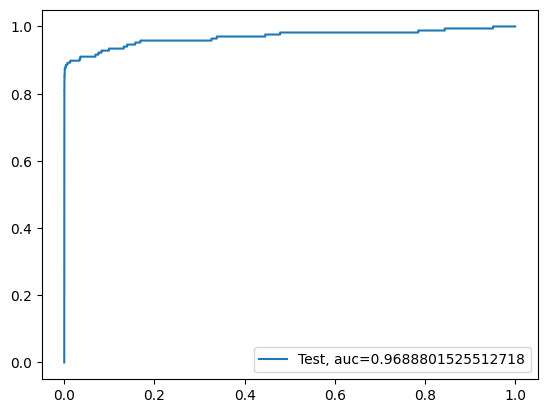

In [72]:
# XGBoost
XGBmodel = XGBClassifier()
XGBmodel.fit(x_train_ADASYN, y_train_ADASYN)
y_pred = XGBmodel.predict(x_test)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))
# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

- ##### Minimal between ADASYN & SMOTE with respect to XGBoost model
- ##### Hence we'll choose XGBOOST as our final model
- ##### XGBoost gives ROC of 96.925% with Recall value of 0.84 

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 13
3rd Top var = 5


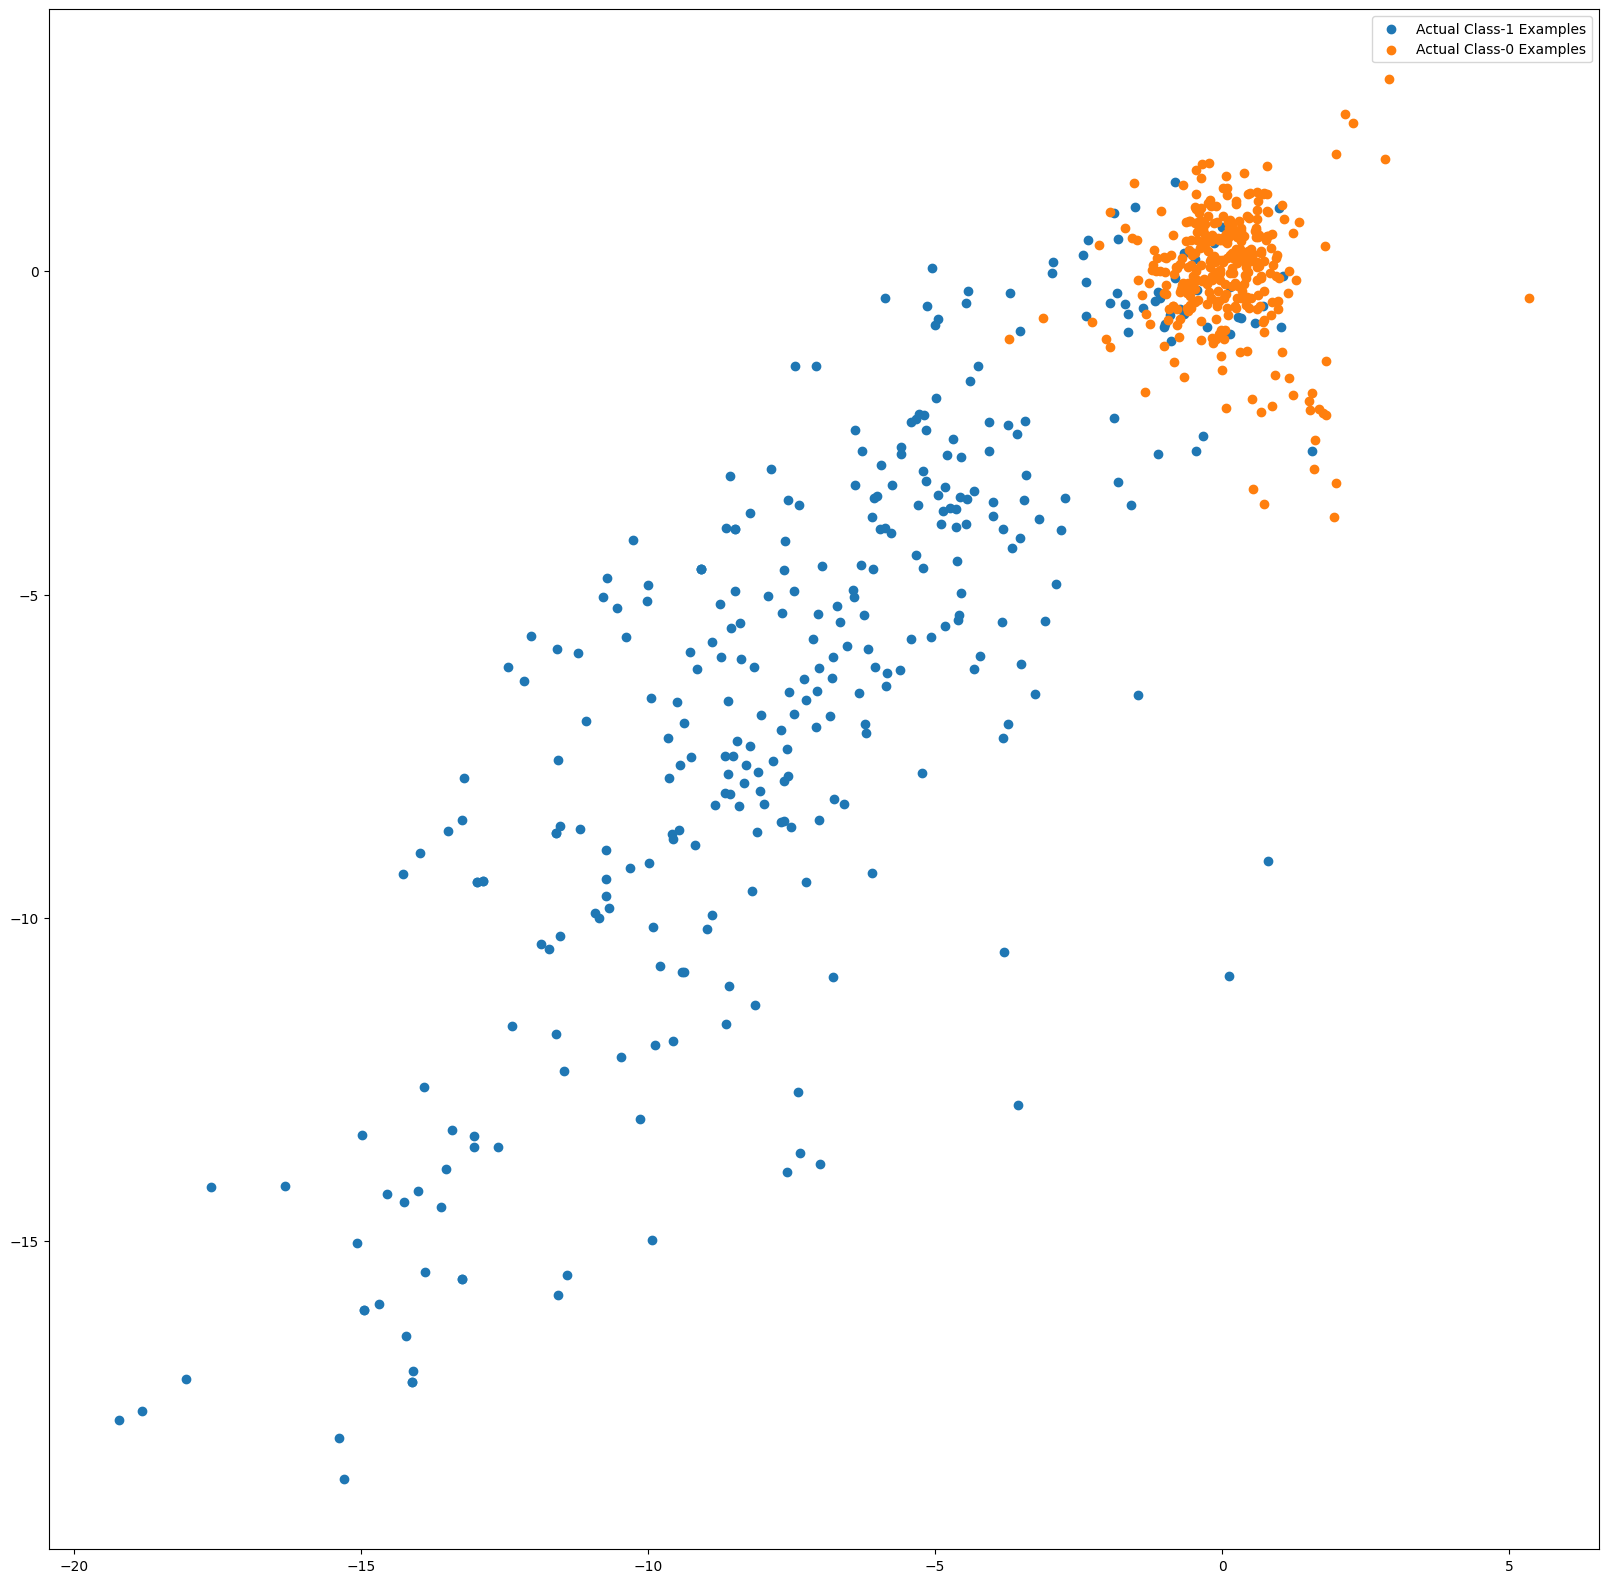

In [73]:
var_imp = []
for i in XGBmodel.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(XGBmodel.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(XGBmodel.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(XGBmodel.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(XGBmodel.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(XGBmodel.feature_importances_)[-2])

X_train_1 = x_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = x_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

[0.00787119 0.01795822 0.00443527 0.01389986 0.04478843 0.00339879
 0.00613621 0.00663644 0.01843668 0.00655539 0.00949859 0.01251959
 0.04829114 0.72133714 0.00595054 0.02909805 0.01063856 0.0110177
 0.00373808 0.00629214 0.0028286  0.00867337]


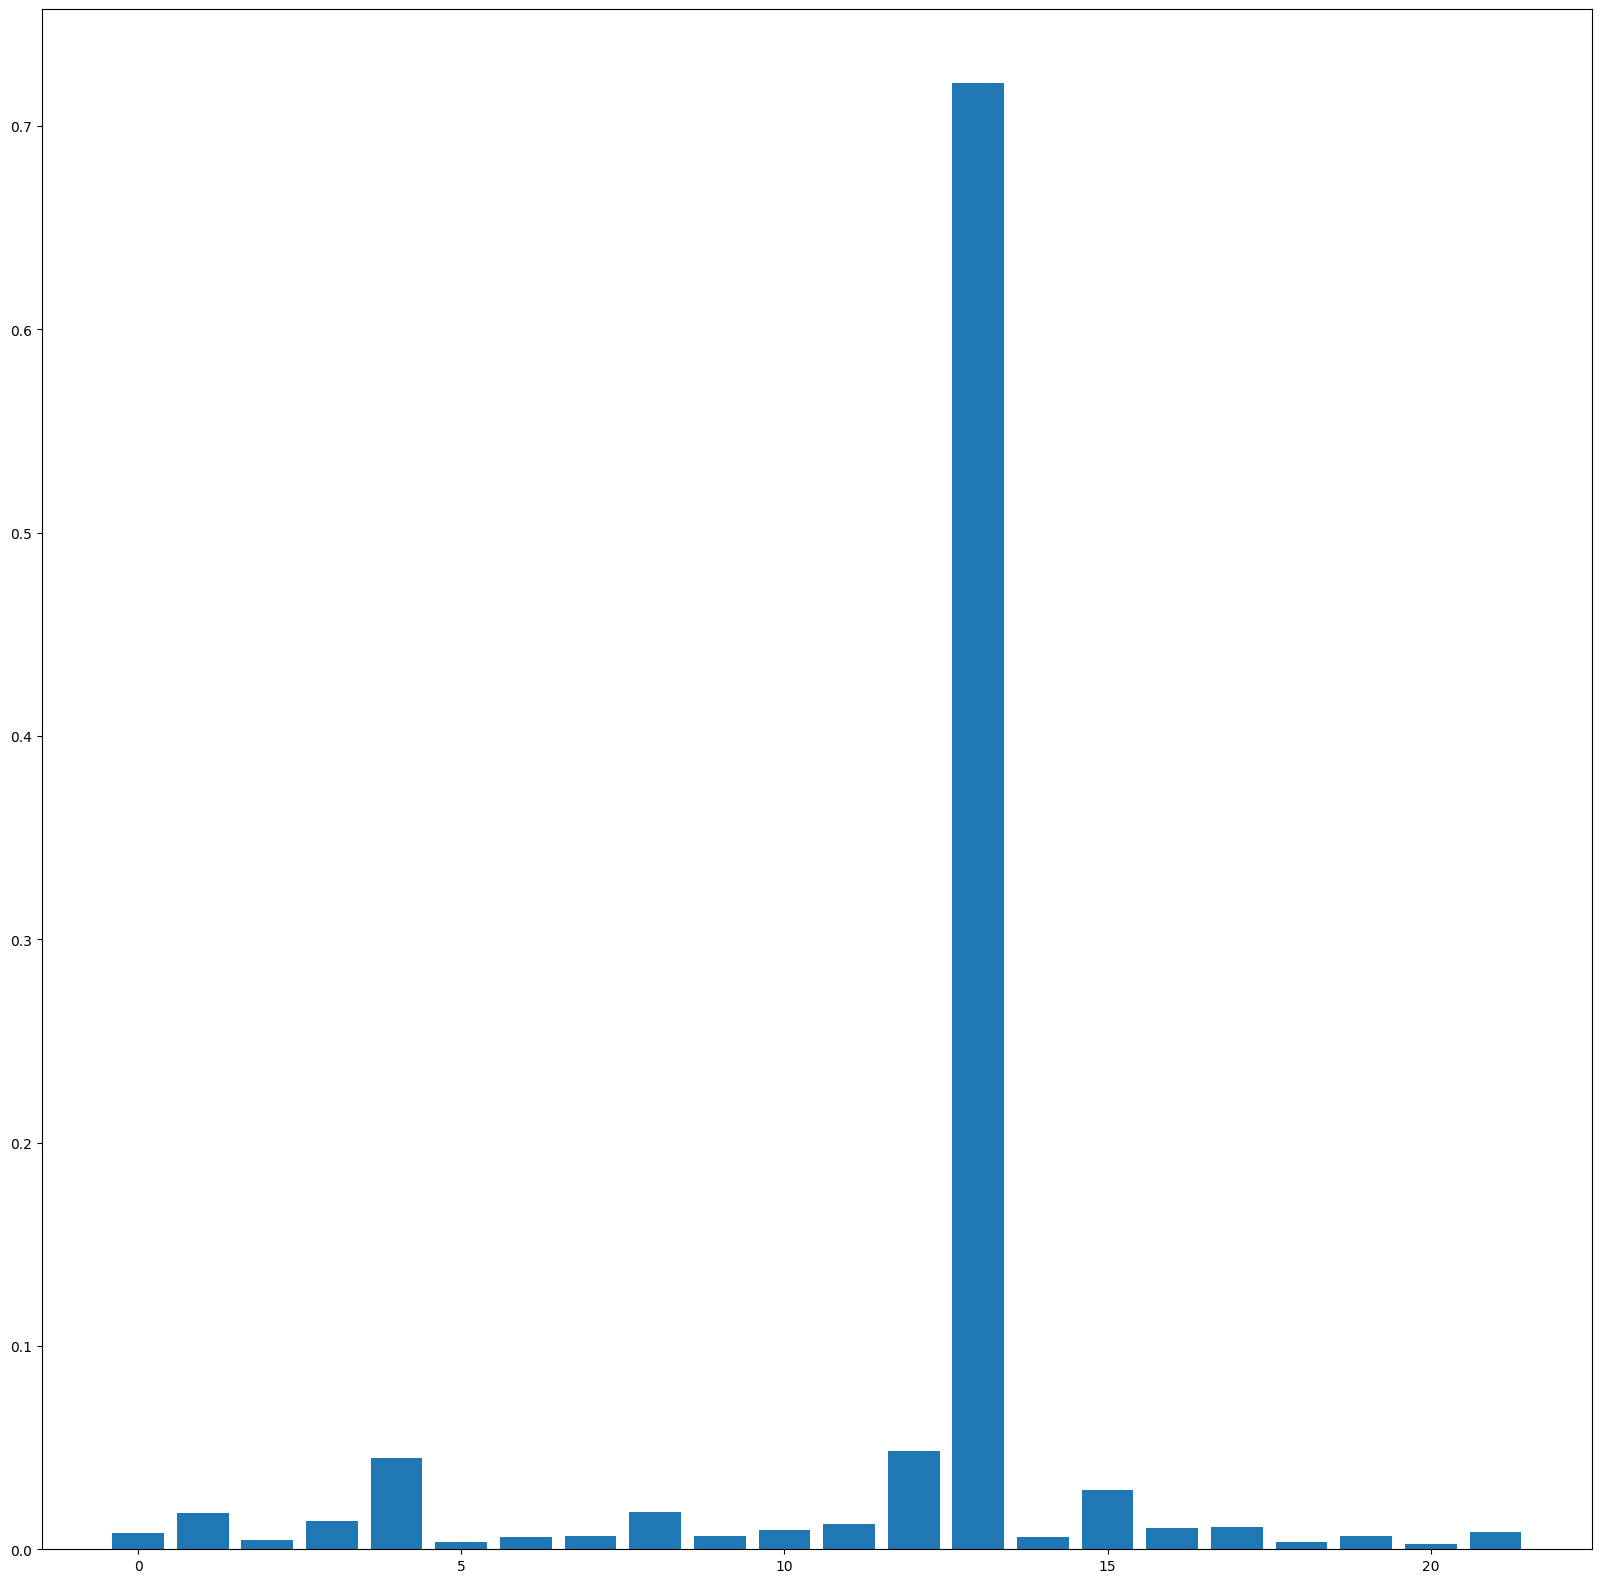

In [74]:
# feature importance
print(XGBmodel.feature_importances_)
# plot
plt.bar(range(len(XGBmodel.feature_importances_)), XGBmodel.feature_importances_)
plt.show()

### Select the SMOTE method which shows the best result on XGBoost model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Parameter Tuning for Final Model by Handling class imbalance

In [75]:
# Hyper Parameter Optimization

params = {
    "learning_rate":    [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth":        [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma":            [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]    
}


In [77]:
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
grid_search = GridSearchCV(clf, param_grid=params, n_jobs=-1, scoring = 'roc_auc', cv=5, verbose=3)
grid_search.fit(x_train_Smote,y_train_Smote)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='roc_auc', verbose=3)

In [79]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
grid_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 10,
 'min_child_weight': 1}

In [81]:
# Hyper Parameter Optimization
# These parameters are leveraged below to get no of trees
params1 = {
    "n_estimators":range(60,180,20)
         }
clf1 = XGBClassifier(colsample_bytree = 0.3, gamma=0.0, learning_rate = 0.3, max_depth=10, min_child_weight=1)
grid_search1 = GridSearchCV(clf1, param_grid=params1, n_jobs=-1, scoring = 'roc_auc', cv=5, verbose=3)
grid_search1.fit(x_train_Smote,y_train_Smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1, param_grid={'n_estimators': range(60, 180, 20)},
             scoring='roc_auc', verbose=3)

In [82]:
grid_search1.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
grid_search1.best_params_

{'n_estimators': 120}

In [84]:
#Evaluate XGboost model
# fit model on training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bytree=0.3,
              gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=1, 
              n_estimators=120, n_jobs=-1,objective='binary:logistic', random_state=65)
XGBmodel.fit(x_train_Smote, y_train_Smote)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

Model Accuracy: 0.9994113698559405
XGboost roc_value: 0.9762535590052154
XGBoost threshold: 0.0007674265652894974
[[96623    45]
 [   26   141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96668
           1       0.76      0.84      0.80       167

    accuracy                           1.00     96835
   macro avg       0.88      0.92      0.90     96835
weighted avg       1.00      1.00      1.00     96835



XGboost roc_value: 0.9762535590052154
XGBoost threshold: 0.0007674265652894974
ROC for the test dataset 97.6%
FPR:  [0.         0.         0.         ... 0.99886208 0.99889312 1.        ]
TPR:  [0.         0.00598802 0.03592814 ... 1.         1.         1.        ]


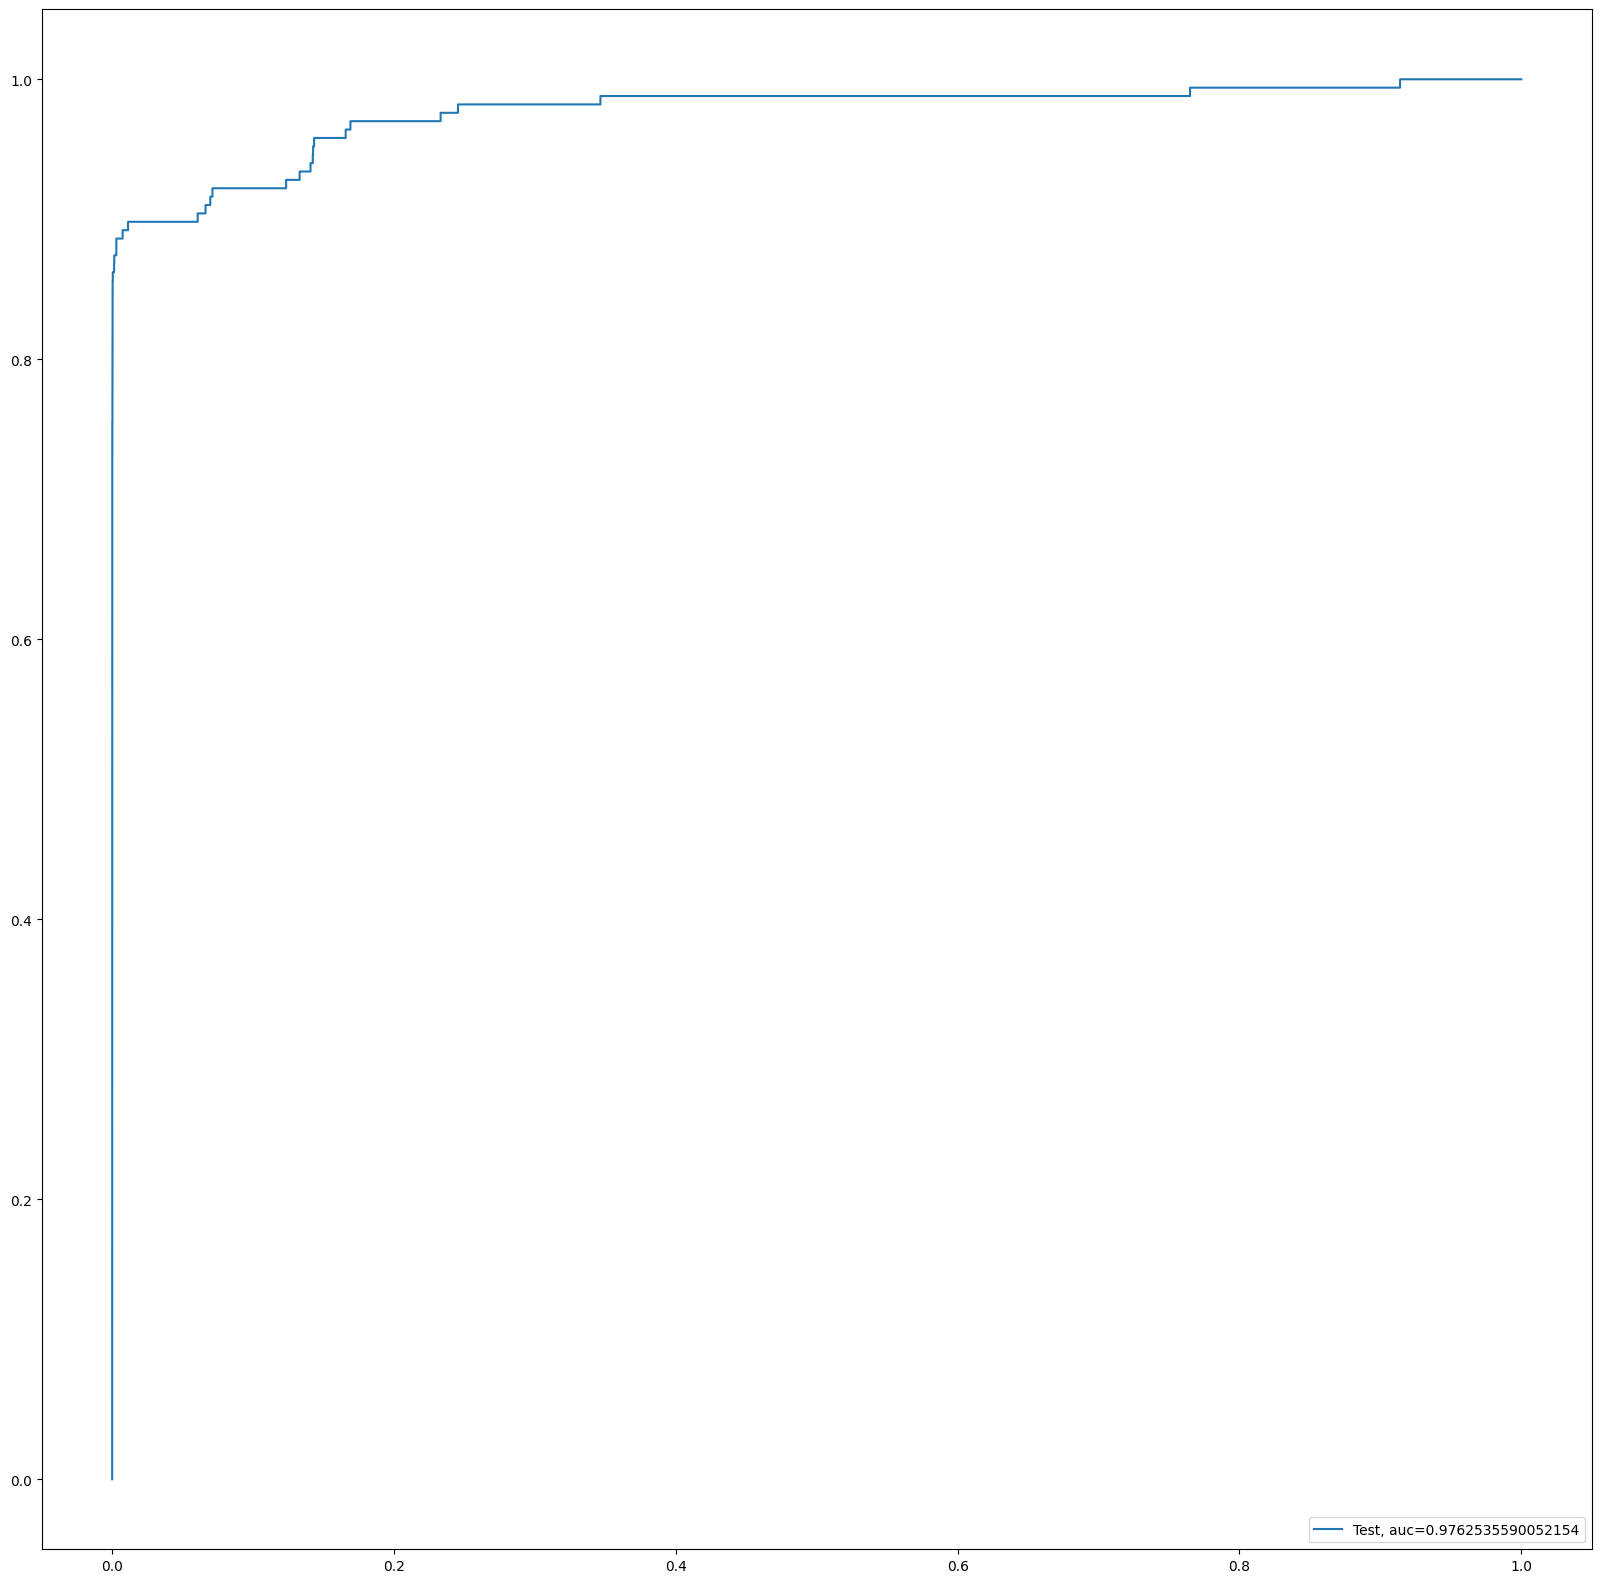

In [85]:
#### Print the FPR,TPR & select the best threshold from the roc curve
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
print("FPR: ",fpr)
print("TPR: ",tpr)
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [86]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9762535590052154
XGBoost threshold: 0.0007674265652894974


### Model Selection:
#### Overall conclusion after running models on balanced data:
#### Conclusion: 
After multiple iterations of various models on various data (over sampled, under sampled, SMOTE, etc) with various hyper parameter tuning, we can come to the conclusion that, XGBoost is the best of the lot & also be able to accurately identify Fraud transactions from real one with 84% (Recall is 0.84). Once we tuned the hyper parameters we witnessed an increase of model accuracy with ROC & Recall value to concrete our opinion. Smote (also ADASYN) appears to be the best data imbalance dealing technique. 

#### Model Accuracy: 99.941%

#### XGboost roc_value: 97.625%

#### XGBoost threshold: 0.0007674265652894974